In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Datasets

In [2]:
# Kiva data
kiva_loans_o = pd.read_csv('kiva-data/kiva_loans.csv')
kiva_mpi_region_locations_o = pd.read_csv('kiva-data/kiva_mpi_region_locations.csv')
loan_theme_ids_o = pd.read_csv('kiva-data/loan_theme_ids.csv')
loan_themes_by_region_o = pd.read_csv('kiva-data/loan_themes_by_region.csv')

# OPHI MPI data
MPI_national_o = pd.read_csv('mpi-data/MPI_national.csv')
MPI_subnational_o = pd.read_csv('mpi-data/MPI_subnational.csv')

# Dataset Cleaning Process

## `kiva_loans`

In [3]:
kiva_loans = kiva_loans_o.copy()
kiva_loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671205 entries, 0 to 671204
Data columns (total 20 columns):
id                    671205 non-null int64
funded_amount         671205 non-null float64
loan_amount           671205 non-null float64
activity              671205 non-null object
sector                671205 non-null object
use                   666973 non-null object
country_code          671197 non-null object
country               671205 non-null object
region                614405 non-null object
currency              671205 non-null object
partner_id            657698 non-null float64
posted_time           671205 non-null object
disbursed_time        668809 non-null object
funded_time           622874 non-null object
term_in_months        671205 non-null float64
lender_count          671205 non-null int64
tags                  499789 non-null object
borrower_genders      666984 non-null object
repayment_interval    671205 non-null object
date                  671205 non

In [4]:
# Times
time_cols = ['posted_time', 'disbursed_time', 'funded_time', 'date']
for col in time_cols:
    kiva_loans[col] = pd.to_datetime(kiva_loans[col])
    
# Lists
def to_list(strg, sep = ', '):
    if strg == 'nan':
        return []
    return strg.split(sep=sep)

list_cols = ['tags', 'borrower_genders']
for col in list_cols:
    kiva_loans[col] = kiva_loans[col].astype(str).apply(to_list)
    
kiva_loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671205 entries, 0 to 671204
Data columns (total 20 columns):
id                    671205 non-null int64
funded_amount         671205 non-null float64
loan_amount           671205 non-null float64
activity              671205 non-null object
sector                671205 non-null object
use                   666973 non-null object
country_code          671197 non-null object
country               671205 non-null object
region                614405 non-null object
currency              671205 non-null object
partner_id            657698 non-null float64
posted_time           671205 non-null datetime64[ns]
disbursed_time        668809 non-null datetime64[ns]
funded_time           622874 non-null datetime64[ns]
term_in_months        671205 non-null float64
lender_count          671205 non-null int64
tags                  671205 non-null object
borrower_genders      671205 non-null object
repayment_interval    671205 non-null object
date    

In [5]:
(kiva_loans['posted_time'] - kiva_loans['date']).max()

Timedelta('0 days 23:59:59')

Note that the `date` is just a less precise version of `posted_time`, so `date` can be dropped

In [6]:
kiva_loans.drop('date', axis=1, inplace=True)
kiva_loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671205 entries, 0 to 671204
Data columns (total 19 columns):
id                    671205 non-null int64
funded_amount         671205 non-null float64
loan_amount           671205 non-null float64
activity              671205 non-null object
sector                671205 non-null object
use                   666973 non-null object
country_code          671197 non-null object
country               671205 non-null object
region                614405 non-null object
currency              671205 non-null object
partner_id            657698 non-null float64
posted_time           671205 non-null datetime64[ns]
disbursed_time        668809 non-null datetime64[ns]
funded_time           622874 non-null datetime64[ns]
term_in_months        671205 non-null float64
lender_count          671205 non-null int64
tags                  671205 non-null object
borrower_genders      671205 non-null object
repayment_interval    671205 non-null object
dtypes: 

The rest of the dataset looks good, some fields may be unusable/useless, but they can be removed later, since this is the main dataset.

## `kiva_mpi_region_locations`

In [7]:
kiva_mpi_region_locations = kiva_mpi_region_locations_o.copy()
kiva_mpi_region_locations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 9 columns):
LocationName    984 non-null object
ISO             1008 non-null object
country         1008 non-null object
region          984 non-null object
world_region    1008 non-null object
MPI             984 non-null float64
geo             2772 non-null object
lat             892 non-null float64
lon             892 non-null float64
dtypes: float64(3), object(6)
memory usage: 195.0+ KB


In [8]:
kiva_mpi_region_locations = kiva_mpi_region_locations[pd.notnull(kiva_mpi_region_locations['MPI'])]
kiva_mpi_region_locations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 984 entries, 0 to 1007
Data columns (total 9 columns):
LocationName    984 non-null object
ISO             984 non-null object
country         984 non-null object
region          984 non-null object
world_region    984 non-null object
MPI             984 non-null float64
geo             984 non-null object
lat             892 non-null float64
lon             892 non-null float64
dtypes: float64(3), object(6)
memory usage: 76.9+ KB


In [9]:
kiva_mpi_region_locations[['geo', 'lat', 'lon']].sample(5)

,geo,lat,lon
758,"(-5.1782884, -80.6548882)",-5.178288,-80.654888
328,"(15.3198766, -91.4918235)",15.319877,-91.491823
856,"(5.7240813, -55.6689636)",5.724081,-55.668964
183,"(1000.0, 1000.0)",NaN,NaN
500,"(5.9222078, -8.2212979)",5.922208,-8.221298


Note how `geo` is just a more complicated version of `lat` and `lon`, so it can be dropped

In [10]:
kiva_mpi_region_locations.drop('geo', axis=1, inplace=True)
kiva_mpi_region_locations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 984 entries, 0 to 1007
Data columns (total 8 columns):
LocationName    984 non-null object
ISO             984 non-null object
country         984 non-null object
region          984 non-null object
world_region    984 non-null object
MPI             984 non-null float64
lat             892 non-null float64
lon             892 non-null float64
dtypes: float64(3), object(5)
memory usage: 69.2+ KB


## `loan_theme_ids`

In [11]:
loan_theme_ids = loan_theme_ids_o.copy()
loan_theme_ids.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 779092 entries, 0 to 779091
Data columns (total 4 columns):
id                 779092 non-null int64
Loan Theme ID      764279 non-null object
Loan Theme Type    764279 non-null object
Partner ID         764279 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 23.8+ MB


In [12]:
loan_theme_ids[~pd.notnull(loan_theme_ids['Loan Theme ID'])].sample(10)

,id,Loan Theme ID,Loan Theme Type,Partner ID
424656,1083844,NaN,NaN,NaN
583125,1243552,NaN,NaN,NaN
420924,1080112,NaN,NaN,NaN
423337,1082525,NaN,NaN,NaN
688341,1350848,NaN,NaN,NaN
429301,1088489,NaN,NaN,NaN
424832,1084020,NaN,NaN,NaN
421145,1080333,NaN,NaN,NaN
421846,1081034,NaN,NaN,NaN
423629,1082817,NaN,NaN,NaN


In [13]:
loan_theme_ids = loan_theme_ids_o[pd.notnull(loan_theme_ids_o['Loan Theme ID'])]
loan_theme_ids.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 764279 entries, 0 to 779091
Data columns (total 4 columns):
id                 764279 non-null int64
Loan Theme ID      764279 non-null object
Loan Theme Type    764279 non-null object
Partner ID         764279 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 29.2+ MB


## `loan_themes_by_region`

In [14]:
loan_themes_by_region = loan_themes_by_region_o.copy()
loan_themes_by_region.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15736 entries, 0 to 15735
Data columns (total 21 columns):
Partner ID            15736 non-null int64
Field Partner Name    15736 non-null object
sector                15736 non-null object
Loan Theme ID         15736 non-null object
Loan Theme Type       15736 non-null object
country               15736 non-null object
forkiva               15736 non-null object
region                15736 non-null object
geocode_old           1200 non-null object
ISO                   15722 non-null object
number                15736 non-null int64
amount                15736 non-null int64
LocationName          15736 non-null object
geocode               13662 non-null object
names                 13661 non-null object
geo                   15736 non-null object
lat                   13662 non-null float64
lon                   13662 non-null float64
mpi_region            15722 non-null object
mpi_geo               9671 non-null object
rural_pct     

Any data without a `mpi_region` is useless to us, so we'll drop all rows with null values for that field

In [15]:
loan_themes_by_region = loan_themes_by_region[pd.notnull(loan_themes_by_region['mpi_region'])]
loan_themes_by_region.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15722 entries, 0 to 15735
Data columns (total 21 columns):
Partner ID            15722 non-null int64
Field Partner Name    15722 non-null object
sector                15722 non-null object
Loan Theme ID         15722 non-null object
Loan Theme Type       15722 non-null object
country               15722 non-null object
forkiva               15722 non-null object
region                15722 non-null object
geocode_old           1200 non-null object
ISO                   15722 non-null object
number                15722 non-null int64
amount                15722 non-null int64
LocationName          15722 non-null object
geocode               13648 non-null object
names                 13647 non-null object
geo                   15722 non-null object
lat                   13648 non-null float64
lon                   13648 non-null float64
mpi_region            15722 non-null object
mpi_geo               9671 non-null object
rural_pct     

In [16]:
loan_themes_by_region[['geocode_old', 'geocode', 'geo', 'lat', 'lon', 'mpi_region', 'mpi_geo']].sample(10)

,geocode_old,geocode,geo,lat,lon,mpi_region,mpi_geo
12354,NaN,"[(33.8194868, 72.6890255)]","(33.8194868, 72.6890255)",33.819487,72.689025,"Islamabad (ICT), Pakistan","(33.7293882, 73.0931461)"
1132,"(40.28, 69.6316667)","[(40.26751549999999, 69.6452877)]","(40.26751549999999, 69.6452877)",40.267516,69.645288,"Sughd, Tajikistan","(39.5155326, 69.097023)"
13704,NaN,"[(0.6732353999999999, 35.5083136)]","(0.6732353999999999, 35.5083136)",0.673235,35.508314,"Eastern, Kenya","(0.7137256, 35.517938)"
15539,NaN,NaN,"(1000.0, 1000.0)",NaN,NaN,PER,NaN
9217,NaN,"[(40.0678351, 44.0788197)]","(40.0678351, 44.0788197)",40.067835,44.078820,ARM,NaN
15613,"(12.5, 104.0)","[(12.3663211, 103.6362715)]","(12.3663211, 103.6362715)",12.366321,103.636271,"Pursat, Cambodia","(12.3663211, 103.6362715)"
3427,NaN,"[(17.6045113, 121.8034058)]","(17.6045113, 121.8034058)",17.604511,121.803406,"Cagayan Valley, Philippines","(16.9753758, 121.8107079)"
2903,NaN,"[(19.8159937, 105.6089981)]","(19.8159937, 105.6089981)",19.815994,105.608998,"Red River Delta, Viet Nam","(20.9033868, 105.9699878)"
11432,NaN,"[(11.3175509, 105.2809247)]","(11.3175509, 105.2809247)",11.317551,105.280925,"Kandal, Cambodia","(11.2237383, 105.1258955)"
3777,NaN,"[(17.2495187, 121.7805686)]","(17.2495187, 121.7805686)",17.249519,121.780569,"Cagayan Valley, Philippines","(16.9753758, 121.8107079)"


Notice that `geocode` and `geo` are basically indentical, and they are both just more complex versions of `lat` and `lon`, so they can be dropped. `geocode_old` is also pretty useless, since it is mostly empty anyways, so it can also be dropped. `mpi_geo` might not be useful either, but it can be dropped later if need be.

In [17]:
loan_themes_by_region.drop(['geocode_old', 'geocode', 'geo'], axis=1, inplace=True)
loan_themes_by_region.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15722 entries, 0 to 15735
Data columns (total 18 columns):
Partner ID            15722 non-null int64
Field Partner Name    15722 non-null object
sector                15722 non-null object
Loan Theme ID         15722 non-null object
Loan Theme Type       15722 non-null object
country               15722 non-null object
forkiva               15722 non-null object
region                15722 non-null object
ISO                   15722 non-null object
number                15722 non-null int64
amount                15722 non-null int64
LocationName          15722 non-null object
names                 13647 non-null object
lat                   13648 non-null float64
lon                   13648 non-null float64
mpi_region            15722 non-null object
mpi_geo               9671 non-null object
rural_pct             14331 non-null float64
dtypes: float64(3), int64(3), object(12)
memory usage: 2.3+ MB


## `MPI_national`

In [18]:
MPI_national = MPI_national_o.copy()
MPI_national.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 8 columns):
ISO                               102 non-null object
Country                           102 non-null object
MPI Urban                         102 non-null float64
Headcount Ratio Urban             102 non-null float64
Intensity of Deprivation Urban    102 non-null float64
MPI Rural                         102 non-null float64
Headcount Ratio Rural             102 non-null float64
Intensity of Deprivation Rural    102 non-null float64
dtypes: float64(6), object(2)
memory usage: 6.5+ KB


## `MPI_subnational`

In [19]:
MPI_subnational = MPI_subnational_o.copy()
MPI_subnational.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 8 columns):
ISO country code                     984 non-null object
Country                              984 non-null object
Sub-national region                  984 non-null object
World region                         984 non-null object
MPI National                         984 non-null float64
MPI Regional                         984 non-null float64
Headcount Ratio Regional             984 non-null float64
Intensity of deprivation Regional    983 non-null float64
dtypes: float64(4), object(4)
memory usage: 61.6+ KB


# Data Cleaning Code (for reseting datasets)

In [20]:
# kiva_loans
kiva_loans = kiva_loans_o.copy()

# Times
time_cols = ['posted_time', 'disbursed_time', 'funded_time', 'date']
for col in time_cols:
    kiva_loans[col] = pd.to_datetime(kiva_loans[col])
    
# Lists
def to_list(strg, sep = ', '):
    if strg == 'nan':
        return []
    return strg.split(sep=sep)

list_cols = ['tags', 'borrower_genders']
for col in list_cols:
    kiva_loans[col] = kiva_loans[col].astype(str).apply(to_list)

kiva_loans.drop('date', axis=1, inplace=True)

# kiva_mpi_region_locations
kiva_mpi_region_locations = kiva_mpi_region_locations_o.copy()
kiva_mpi_region_locations = kiva_mpi_region_locations[pd.notnull(kiva_mpi_region_locations['MPI'])]
kiva_mpi_region_locations.drop('geo', axis=1, inplace=True)

# loan_theme_ids
loan_theme_ids = loan_theme_ids_o.copy()
loan_theme_ids = loan_theme_ids_o[pd.notnull(loan_theme_ids_o['Loan Theme ID'])]

# loan_themes_by_region
loan_themes_by_region = loan_themes_by_region_o.copy()
loan_themes_by_region = loan_themes_by_region[pd.notnull(loan_themes_by_region['mpi_region'])]
loan_themes_by_region.drop(['geocode_old', 'geocode', 'geo'], axis=1, inplace=True)

# MPI_national
MPI_national = MPI_national_o.copy()

# MPI_subnational
MPI_subnational = MPI_subnational_o.copy()

# Merging datasets

In [21]:
merged_data = kiva_loans.merge(
    loan_theme_ids,
    how='left',
    on='id',
    suffixes=('_kl','_lti')
)
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 671205 entries, 0 to 671204
Data columns (total 22 columns):
id                    671205 non-null int64
funded_amount         671205 non-null float64
loan_amount           671205 non-null float64
activity              671205 non-null object
sector                671205 non-null object
use                   666973 non-null object
country_code          671197 non-null object
country               671205 non-null object
region                614405 non-null object
currency              671205 non-null object
partner_id            657698 non-null float64
posted_time           671205 non-null datetime64[ns]
disbursed_time        668809 non-null datetime64[ns]
funded_time           622874 non-null datetime64[ns]
term_in_months        671205 non-null float64
lender_count          671205 non-null int64
tags                  671205 non-null object
borrower_genders      671205 non-null object
repayment_interval    671205 non-null object
Loan The

In [22]:
merged_data = merged_data.merge(
    loan_themes_by_region,
    how='left',
    on=['Loan Theme ID', 'Partner ID', 'region'],
    suffixes=('', '_ltbr')
)
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 671205 entries, 0 to 671204
Data columns (total 37 columns):
id                      671205 non-null int64
funded_amount           671205 non-null float64
loan_amount             671205 non-null float64
activity                671205 non-null object
sector                  671205 non-null object
use                     666973 non-null object
country_code            671197 non-null object
country                 671205 non-null object
region                  614405 non-null object
currency                671205 non-null object
partner_id              657698 non-null float64
posted_time             671205 non-null datetime64[ns]
disbursed_time          668809 non-null datetime64[ns]
funded_time             622874 non-null datetime64[ns]
term_in_months          671205 non-null float64
lender_count            671205 non-null int64
tags                    671205 non-null object
borrower_genders        671205 non-null object
repayment_interva

Remove all data without a `mpi_region`, since we need the more granular data.

In [23]:
merged_data = merged_data[pd.notnull(merged_data['mpi_region'])]
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 533461 entries, 1 to 671149
Data columns (total 37 columns):
id                      533461 non-null int64
funded_amount           533461 non-null float64
loan_amount             533461 non-null float64
activity                533461 non-null object
sector                  533461 non-null object
use                     533456 non-null object
country_code            533453 non-null object
country                 533461 non-null object
region                  533461 non-null object
currency                533461 non-null object
partner_id              533461 non-null float64
posted_time             533461 non-null datetime64[ns]
disbursed_time          533461 non-null datetime64[ns]
funded_time             499549 non-null datetime64[ns]
term_in_months          533461 non-null float64
lender_count            533461 non-null int64
tags                    533461 non-null object
borrower_genders        533461 non-null object
repayment_interva

In [24]:
(merged_data['sector'] != merged_data['sector_ltbr']).sum()

517133

These columns actually have rather different values, so I will leave both. Let's look at them though, to see if they are actually similar, just formatted differently

In [25]:
merged_data[['sector', 'sector_ltbr']].sample(15)

,sector,sector_ltbr
368615,Agriculture,General Financial Inclusion
373137,Agriculture,Agriculture
370269,Clothing,General Financial Inclusion
500525,Agriculture,General Financial Inclusion
154901,Construction,General Financial Inclusion
601659,Services,General Financial Inclusion
383422,Retail,General Financial Inclusion
330483,Personal Use,Agriculture
587972,Agriculture,Education
436796,Manufacturing,General Financial Inclusion


In [26]:
temp = merged_data[merged_data['sector_ltbr'] != 'General Financial Inclusion']
temp = temp[temp['sector'] != temp['sector_ltbr']][['sector', 'sector_ltbr']]
temp.sample(10)

,sector,sector_ltbr
483983,Personal Use,Water and Sanitation
289900,Retail,Education
165590,Personal Use,Agriculture
559253,Agriculture,Other
558431,Education,Agriculture
545301,Personal Use,Water and Sanitation
557501,Services,Water and Sanitation
657822,Services,Mobile Money and ICT
569615,Personal Use,Water and Sanitation
597747,Personal Use,Water and Sanitation


We can see here that many of the rows that don't have "General Financial Inclusion" and that `sector` and `sector_ltbr` don't match, have either "Personal Use" under `sector` or "other" under `sector_ltbr`. Let's see if any data does not follow this trend

In [27]:
temp = temp[temp['sector'] != 'Personal Use']
temp = temp[temp['sector_ltbr'] != 'other']
temp = temp[temp['sector_ltbr'] != 'Other']
temp.sample(10)

,sector,sector_ltbr
599539,Agriculture,Water and Sanitation
605708,Agriculture,Education
600770,Clothing,Water and Sanitation
304126,Arts,Artisan
617158,Services,Mobile Money and ICT
477523,Education,Clean Energy
500719,Agriculture,Education
75939,Agriculture,Education
606003,Clothing,Education
316124,Education,Clean Energy


In [28]:
len(temp)

11348

These last few (11,348) entries have rather conflicting results, so I'll leave both features here for now, but if we want to combine them, it shouldn't be too hard, and we would only lose 11k entries

In [29]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 533461 entries, 1 to 671149
Data columns (total 37 columns):
id                      533461 non-null int64
funded_amount           533461 non-null float64
loan_amount             533461 non-null float64
activity                533461 non-null object
sector                  533461 non-null object
use                     533456 non-null object
country_code            533453 non-null object
country                 533461 non-null object
region                  533461 non-null object
currency                533461 non-null object
partner_id              533461 non-null float64
posted_time             533461 non-null datetime64[ns]
disbursed_time          533461 non-null datetime64[ns]
funded_time             499549 non-null datetime64[ns]
term_in_months          533461 non-null float64
lender_count            533461 non-null int64
tags                    533461 non-null object
borrower_genders        533461 non-null object
repayment_interva

In [30]:
(merged_data['Loan Theme Type'] != merged_data['Loan Theme Type_ltbr']).sum()

68

There seems to be some uniqueness within these features, so let's see what they are

In [31]:
merged_data[merged_data['Loan Theme Type'] != merged_data['Loan Theme Type_ltbr']][['Loan Theme Type','Loan Theme Type_ltbr']].drop_duplicates()

,Loan Theme Type,Loan Theme Type_ltbr
70912,Zaf̬n,ZafÍÎn


Since the `_ltbr` version of the dataset has more to do with merging, I will just keep it, but remove the 'lbtr' from the end

In [32]:
merged_data['Loan Theme Type'] = merged_data['Loan Theme Type_ltbr']
merged_data.drop('Loan Theme Type_ltbr', axis=1, inplace=True)
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 533461 entries, 1 to 671149
Data columns (total 36 columns):
id                    533461 non-null int64
funded_amount         533461 non-null float64
loan_amount           533461 non-null float64
activity              533461 non-null object
sector                533461 non-null object
use                   533456 non-null object
country_code          533453 non-null object
country               533461 non-null object
region                533461 non-null object
currency              533461 non-null object
partner_id            533461 non-null float64
posted_time           533461 non-null datetime64[ns]
disbursed_time        533461 non-null datetime64[ns]
funded_time           499549 non-null datetime64[ns]
term_in_months        533461 non-null float64
lender_count          533461 non-null int64
tags                  533461 non-null object
borrower_genders      533461 non-null object
repayment_interval    533461 non-null object
Loan The

In [33]:
(merged_data['country'] != merged_data['country_ltbr']).sum()

0

These are identical so I can just drop one

In [34]:
merged_data.drop('country_ltbr', axis=1, inplace=True)
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 533461 entries, 1 to 671149
Data columns (total 35 columns):
id                    533461 non-null int64
funded_amount         533461 non-null float64
loan_amount           533461 non-null float64
activity              533461 non-null object
sector                533461 non-null object
use                   533456 non-null object
country_code          533453 non-null object
country               533461 non-null object
region                533461 non-null object
currency              533461 non-null object
partner_id            533461 non-null float64
posted_time           533461 non-null datetime64[ns]
disbursed_time        533461 non-null datetime64[ns]
funded_time           499549 non-null datetime64[ns]
term_in_months        533461 non-null float64
lender_count          533461 non-null int64
tags                  533461 non-null object
borrower_genders      533461 non-null object
repayment_interval    533461 non-null object
Loan The

The rest of the features contain unique data, so I will just leave them as they are.

Below is the data flow for merging all of the MPI related data, which will later be merged with this main data to create one nice, clean dataset.

In [35]:
mpi_info = kiva_mpi_region_locations.merge(
    MPI_subnational,
    how='outer',
    left_on=['country', 'region', 'world_region'],
    right_on=['Country', 'Sub-national region', 'World region'],
    suffixes=('', '_ms')
)
mpi_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 984 entries, 0 to 983
Data columns (total 16 columns):
LocationName                         984 non-null object
ISO                                  984 non-null object
country                              984 non-null object
region                               984 non-null object
world_region                         984 non-null object
MPI                                  984 non-null float64
lat                                  892 non-null float64
lon                                  892 non-null float64
ISO country code                     984 non-null object
Country                              984 non-null object
Sub-national region                  984 non-null object
World region                         984 non-null object
MPI National                         984 non-null float64
MPI Regional                         984 non-null float64
Headcount Ratio Regional             984 non-null float64
Intensity of deprivation Regional 

Remove merged on features `Country`, `Sub-national region`, and `World region`

In [36]:
mpi_info.drop(['Country', 'Sub-national region', 'World region'], axis=1, inplace=True)
mpi_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 984 entries, 0 to 983
Data columns (total 13 columns):
LocationName                         984 non-null object
ISO                                  984 non-null object
country                              984 non-null object
region                               984 non-null object
world_region                         984 non-null object
MPI                                  984 non-null float64
lat                                  892 non-null float64
lon                                  892 non-null float64
ISO country code                     984 non-null object
MPI National                         984 non-null float64
MPI Regional                         984 non-null float64
Headcount Ratio Regional             984 non-null float64
Intensity of deprivation Regional    983 non-null float64
dtypes: float64(7), object(6)
memory usage: 107.6+ KB


In [37]:
(mpi_info['ISO'] != mpi_info['ISO country code']).sum()

0

`ISO` and `ISO country code` are identical, so one can be removed

In [38]:
mpi_info.drop('ISO country code', axis=1, inplace=True)
mpi_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 984 entries, 0 to 983
Data columns (total 12 columns):
LocationName                         984 non-null object
ISO                                  984 non-null object
country                              984 non-null object
region                               984 non-null object
world_region                         984 non-null object
MPI                                  984 non-null float64
lat                                  892 non-null float64
lon                                  892 non-null float64
MPI National                         984 non-null float64
MPI Regional                         984 non-null float64
Headcount Ratio Regional             984 non-null float64
Intensity of deprivation Regional    983 non-null float64
dtypes: float64(7), object(5)
memory usage: 99.9+ KB


In [39]:
(mpi_info['MPI'] != mpi_info['MPI Regional']).sum()

0

`MPI` and `MPI Regional` are identical, so one can be removed

In [40]:
mpi_info.drop('MPI', axis=1, inplace=True)
mpi_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 984 entries, 0 to 983
Data columns (total 11 columns):
LocationName                         984 non-null object
ISO                                  984 non-null object
country                              984 non-null object
region                               984 non-null object
world_region                         984 non-null object
lat                                  892 non-null float64
lon                                  892 non-null float64
MPI National                         984 non-null float64
MPI Regional                         984 non-null float64
Headcount Ratio Regional             984 non-null float64
Intensity of deprivation Regional    983 non-null float64
dtypes: float64(6), object(5)
memory usage: 92.2+ KB


In [41]:
mpi_info = mpi_info.merge(
    MPI_national,
    how='left',
    left_on=['country', 'ISO'],
    right_on=['Country', 'ISO'],
    suffixes=('', '_mn')
)
mpi_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 984 entries, 0 to 983
Data columns (total 18 columns):
LocationName                         984 non-null object
ISO                                  984 non-null object
country                              984 non-null object
region                               984 non-null object
world_region                         984 non-null object
lat                                  892 non-null float64
lon                                  892 non-null float64
MPI National                         984 non-null float64
MPI Regional                         984 non-null float64
Headcount Ratio Regional             984 non-null float64
Intensity of deprivation Regional    983 non-null float64
Country                              984 non-null object
MPI Urban                            984 non-null float64
Headcount Ratio Urban                984 non-null float64
Intensity of Deprivation Urban       984 non-null float64
MPI Rural                      

Again, drop the columns that were merged on from the second dataset (not `ISO` since it was identical and there is still only 1 column with that value)

In [42]:
mpi_info.drop(['Country'], axis=1, inplace=True)

In [43]:
mpi_info[[key for key in mpi_info.keys() if 'mpi' in key.lower()]].sample(5)

,MPI National,MPI Regional,MPI Urban,MPI Rural
376,0.066,0.056,0.039,0.093
151,0.017,0.034,0.007,0.028
79,0.089,0.077,0.019,0.191
887,0.252,0.324,0.081,0.356
790,0.331,0.373,0.142,0.472


Notice that all features with *'mpi'* in the name are different, so they are all good to stay

In [44]:
mpi_info[[key for key in mpi_info.keys() if 'head' in key.lower()]].sample(5)

,Headcount Ratio Regional,Headcount Ratio Urban,Headcount Ratio Rural
581,60.1,38.2,83.90
732,30.2,2.9,27.13
367,62.8,25.2,65.90
978,33.5,8.7,46.27
305,86.6,43.6,85.36


The same goes for the features with *'head'* in the name

In [45]:
mpi_info[[key for key in mpi_info.keys() if 'intensity' in key.lower()]].sample(5)

,Intensity of deprivation Regional,Intensity of Deprivation Urban,Intensity of Deprivation Rural
831,41.3,42.3,42.1
753,44.2,42.7,49.9
395,45.9,38.7,45.0
600,41.5,42.4,47.0
448,48.3,43.6,47.5


And the same for *'intensity'*

So this is the final dataset for all MPI information, so now it's time to merge it with the main dataset. First, I want to convert the features into `snake_case` because this is python, and also what I prefer

In [46]:
mpi_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 984 entries, 0 to 983
Data columns (total 17 columns):
LocationName                         984 non-null object
ISO                                  984 non-null object
country                              984 non-null object
region                               984 non-null object
world_region                         984 non-null object
lat                                  892 non-null float64
lon                                  892 non-null float64
MPI National                         984 non-null float64
MPI Regional                         984 non-null float64
Headcount Ratio Regional             984 non-null float64
Intensity of deprivation Regional    983 non-null float64
MPI Urban                            984 non-null float64
Headcount Ratio Urban                984 non-null float64
Intensity of Deprivation Urban       984 non-null float64
MPI Rural                            984 non-null float64
Headcount Ratio Rural         

In [47]:
snake_case = lambda colname: colname.lower().replace(' ','_')
mpi_info.rename(snake_case, axis=1, inplace=True)
mpi_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 984 entries, 0 to 983
Data columns (total 17 columns):
locationname                         984 non-null object
iso                                  984 non-null object
country                              984 non-null object
region                               984 non-null object
world_region                         984 non-null object
lat                                  892 non-null float64
lon                                  892 non-null float64
mpi_national                         984 non-null float64
mpi_regional                         984 non-null float64
headcount_ratio_regional             984 non-null float64
intensity_of_deprivation_regional    983 non-null float64
mpi_urban                            984 non-null float64
headcount_ratio_urban                984 non-null float64
intensity_of_deprivation_urban       984 non-null float64
mpi_rural                            984 non-null float64
headcount_ratio_rural         

I'll do the same to `merged_data` before joining the last 2 datasets

In [48]:
snake_case = lambda colname: colname.lower().replace(' ','_')
merged_data.rename(snake_case, axis=1, inplace=True)
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 533461 entries, 1 to 671149
Data columns (total 35 columns):
id                    533461 non-null int64
funded_amount         533461 non-null float64
loan_amount           533461 non-null float64
activity              533461 non-null object
sector                533461 non-null object
use                   533456 non-null object
country_code          533453 non-null object
country               533461 non-null object
region                533461 non-null object
currency              533461 non-null object
partner_id            533461 non-null float64
posted_time           533461 non-null datetime64[ns]
disbursed_time        533461 non-null datetime64[ns]
funded_time           499549 non-null datetime64[ns]
term_in_months        533461 non-null float64
lender_count          533461 non-null int64
tags                  533461 non-null object
borrower_genders      533461 non-null object
repayment_interval    533461 non-null object
loan_the

In [186]:
final_data = merged_data.merge(
    mpi_info,
    how='left',
    left_on='mpi_region',
    right_on='locationname',
    suffixes=('', '_mi')
)
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 533461 entries, 0 to 533460
Data columns (total 52 columns):
id                                   533461 non-null int64
funded_amount                        533461 non-null float64
loan_amount                          533461 non-null float64
activity                             533461 non-null object
sector                               533461 non-null object
use                                  533456 non-null object
country_code                         533453 non-null object
country                              533461 non-null object
region                               533461 non-null object
currency                             533461 non-null object
partner_id                           533461 non-null float64
posted_time                          533461 non-null datetime64[ns]
disbursed_time                       533461 non-null datetime64[ns]
funded_time                          499549 non-null datetime64[ns]
term_in_months         

Remove `locationname_mi`, since it was merged on

In [187]:
final_data.drop('locationname_mi', axis=1, inplace=True)
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 533461 entries, 0 to 533460
Data columns (total 51 columns):
id                                   533461 non-null int64
funded_amount                        533461 non-null float64
loan_amount                          533461 non-null float64
activity                             533461 non-null object
sector                               533461 non-null object
use                                  533456 non-null object
country_code                         533453 non-null object
country                              533461 non-null object
region                               533461 non-null object
currency                             533461 non-null object
partner_id                           533461 non-null float64
posted_time                          533461 non-null datetime64[ns]
disbursed_time                       533461 non-null datetime64[ns]
funded_time                          499549 non-null datetime64[ns]
term_in_months         

In [188]:
(final_data['country'] != final_data['country_mi']).sum()

95476

A good amount of the data has different values for these features, let's take a closer look

In [189]:
temp = final_data[final_data['country'] != final_data['country_mi']]
temp.sample(10)

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,...,mpi_national,mpi_regional,headcount_ratio_regional,intensity_of_deprivation_regional,mpi_urban,headcount_ratio_urban,intensity_of_deprivation_urban,mpi_rural,headcount_ratio_rural,intensity_of_deprivation_rural
508296,1305407,3000.0,3000.0,Cattle,Agriculture,"to pay for two cows and oxen, as well as forag...",AM,Armenia,"Chknagh village, Aragatsotn region",USD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
409719,1192804,1925.0,1925.0,Farming,Agriculture,to buy seeds and fertilizers.,TJ,Tajikistan,Dj.Rasulov,TJS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97289,803921,825.0,825.0,Food,Food,"to buy Irish potatoes, eggs, meat, chicken, co...",TZ,Tanzania,Dar es Salaam,TZS,...,0.284,0.143,30.5,46.9,0.122,27.7,44.3,0.351,68.56,51.2
502713,1298472,750.0,750.0,Sewing,Services,"to purchase an ""overlock"" sewing machine.",MM,Myanmar (Burma),Pakokku,MMK,...,0.134,0.134,31.6,42.6,0.040,9.6,41.7,0.168,37.46,44.8
478912,1272064,600.0,600.0,Food Production/Sales,Food,"to buy cooking oil, bananas, taro, seasoning, ...",WS,Samoa,Vaitoomuli Palauli,WST,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
357132,1134221,625.0,625.0,Beauty Salon,Services,to buy up-to-date salon equipment and cosmeti...,TZ,Tanzania,Dar es Salaam,TZS,...,0.284,0.143,30.5,46.9,0.122,27.7,44.3,0.351,68.56,51.2
528133,1327991,0.0,325.0,Personal Housing Expenses,Housing,to access basic sanitation by building a toile...,IN,India,Karur,INR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
180178,917679,575.0,575.0,Tailoring,Services,"to purchase materials like thread, needles, bl...",IN,India,"Jeypore, Odisha",INR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
180816,918237,2700.0,2700.0,Clothing Sales,Clothing,to increase her merchandise with a new collect...,LB,Lebanon,Qana,USD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45174,724593,275.0,275.0,Dairy,Agriculture,To purchase a dairy cow to start a dairy produ...,IN,India,Dhupguri,INR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Since country_mi is NaN often, let's only check when that isn't true

In [190]:
temp = temp[pd.notnull(temp['country_mi'])][['country','country_mi']]
temp.drop_duplicates()

,country,country_mi
35,Tanzania,"Tanzania, United Republic of"
192,Bolivia,"Bolivia, Plurinational State of"
458,Vietnam,Viet Nam
1665,The Democratic Republic of the Congo,"Congo, Democratic Republic of the"
59866,Myanmar (Burma),Myanmar


All of the other cases just have alternate spellings, so dropping `country_mi` should cause no issues

In [191]:
final_data.drop('country_mi', axis=1, inplace=True)
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 533461 entries, 0 to 533460
Data columns (total 50 columns):
id                                   533461 non-null int64
funded_amount                        533461 non-null float64
loan_amount                          533461 non-null float64
activity                             533461 non-null object
sector                               533461 non-null object
use                                  533456 non-null object
country_code                         533453 non-null object
country                              533461 non-null object
region                               533461 non-null object
currency                             533461 non-null object
partner_id                           533461 non-null float64
posted_time                          533461 non-null datetime64[ns]
disbursed_time                       533461 non-null datetime64[ns]
funded_time                          499549 non-null datetime64[ns]
term_in_months         

In [192]:
(final_data['mpi_region'] != final_data['region_mi']).sum()

533461

I have a strong feeling that `region_mi` is a substring of `mpi_region`, so let's see how often that is the case

In [193]:
vecin = np.vectorize(str.__contains__)
temp = final_data[['mpi_region', 'region_mi']].dropna()
(~vecin(temp['mpi_region'], temp['region_mi'])).sum()

0

This means that `region_mi` is always in `mpi_region`, so we can remove `region_mi` because it contains less info, right? Take a look at the data however

In [194]:
temp.sample(10)

,mpi_region,region_mi
350167,"Mountains, Ecuador",Mountains
259682,"Lambayeque, Peru",Lambayeque
78529,"Medellin A.M., Colombia",Medellin A.M.
78425,"Mimaropa, Philippines",Mimaropa
485131,"Nyanza, Kenya",Nyanza
323971,"Nyanza, Kenya",Nyanza
520639,"Cusco, Peru",Cusco
379231,"Western Visayas, Philippines",Western Visayas
59008,"Central, Kenya",Central
509394,"Takeo, Cambodia",Takeo


If I add the country to this data, it should be even more clear

In [195]:
temp = final_data[['mpi_region', 'region_mi', 'country']].dropna()
temp.sample(10)

,mpi_region,region_mi,country
284657,"Mopti, Mali",Mopti,Mali
15054,"Cusco, Peru",Cusco,Peru
341815,"Kampong Cham, Cambodia",Kampong Cham,Cambodia
155041,"Central, Kenya",Central,Kenya
461663,"Western, Kenya",Western,Kenya
311385,"Mimaropa, Philippines",Mimaropa,Philippines
420631,"Central Visayas, Philippines",Central Visayas,Philippines
175375,"Western, Kenya",Western,Kenya
217727,"Central, Jordan",Central,Jordan
430976,"Kampong Cham, Cambodia",Kampong Cham,Cambodia


So it is better to keep `region_mi` over `mpi_region`, however I will change the names so it makes a little more sense. Later I realized that `region_mi` had some NaNs, so instead of just renaming, if `region_mi` is NaN, it takes the value from `mpi_region`

In [196]:
final_data['mpi_region'] = final_data['region_mi'].fillna(final_data['mpi_region'])
final_data.drop('region_mi', axis=1, inplace=True)
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 533461 entries, 0 to 533460
Data columns (total 49 columns):
id                                   533461 non-null int64
funded_amount                        533461 non-null float64
loan_amount                          533461 non-null float64
activity                             533461 non-null object
sector                               533461 non-null object
use                                  533456 non-null object
country_code                         533453 non-null object
country                              533461 non-null object
region                               533461 non-null object
currency                             533461 non-null object
partner_id                           533461 non-null float64
posted_time                          533461 non-null datetime64[ns]
disbursed_time                       533461 non-null datetime64[ns]
funded_time                          499549 non-null datetime64[ns]
term_in_months         

In [197]:
final_data[['lat_mi', 'lon_mi', 'mpi_geo']].sample(10)

,lat_mi,lon_mi,mpi_geo
254823,9.843207,118.736478,"(9.843206499999999, 118.7364783)"
380088,NaN,NaN,NaN
54767,-13.531950,-71.967463,"(-13.53195, -71.96746259999999)"
509921,38.559772,68.787038,"(38.5597722, 68.7870384)"
462357,15.498381,-90.982067,"(15.4983808, -90.9820668)"
202859,-1.469302,-78.816940,"(-1.4693018, -78.8169396)"
292267,-15.766671,35.016787,"(-15.7666707, 35.0167866)"
226216,13.768200,-88.129139,"(13.7682, -88.1291387)"
425590,13.667260,102.897510,"(13.6672596, 102.8975098)"
335776,10.510464,7.416505,"(10.5104642, 7.4165053)"


As you can see here, `lat_mi` and `lon_mi` is just the decomposed information from `mpi_geo`, so we can drop `mpi_geo`. I will also rename the other features to `mpi_region_lat` and `mpi_region_lon` to make it a little more clear

In [198]:
final_data['mpi_region_lat'] = final_data['lat_mi']
final_data['mpi_region_lon'] = final_data['lon_mi']
final_data.drop(['mpi_geo', 'lat_mi', 'lon_mi'], axis=1, inplace=True)
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 533461 entries, 0 to 533460
Data columns (total 48 columns):
id                                   533461 non-null int64
funded_amount                        533461 non-null float64
loan_amount                          533461 non-null float64
activity                             533461 non-null object
sector                               533461 non-null object
use                                  533456 non-null object
country_code                         533453 non-null object
country                              533461 non-null object
region                               533461 non-null object
currency                             533461 non-null object
partner_id                           533461 non-null float64
posted_time                          533461 non-null datetime64[ns]
disbursed_time                       533461 non-null datetime64[ns]
funded_time                          499549 non-null datetime64[ns]
term_in_months         

The last feature to check here is `iso_mi`. Let's see how often it is identical to iso (not neither is NaN)

In [393]:
iso_info = final_data[['iso_mi', 'iso']].dropna()
(iso_info['iso_mi'] != iso_info['iso']).sum()

0

`iso_mi` is identical to `iso`, so it can just be dropped

In [394]:
final_data.drop('iso_mi', axis=1, inplace=True)
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 533461 entries, 0 to 533460
Data columns (total 85 columns):
id                                   533461 non-null int64
funded_amount                        533461 non-null float64
loan_amount                          533461 non-null float64
activity                             533461 non-null object
sector                               533461 non-null object
country                              533461 non-null object
region                               533461 non-null object
currency                             533461 non-null object
partner_id                           533461 non-null float64
posted_time                          533461 non-null datetime64[ns]
disbursed_time                       533461 non-null datetime64[ns]
funded_time                          499549 non-null datetime64[ns]
term_in_months                       533461 non-null float64
lender_count                         533461 non-null int64
repayment_interval     

# Adding features

In [199]:
def ior(i):
    i = iter(i)
    try:
        s = next(i)
    except StopIteration:
        return None
    for e in i:
        s = s | e
    return s

all_tags = ior(final_data['tags'].apply(set))
all_tags

{'#Animals',
 '#Biz Durable Asset',
 '#Eco-friendly',
 '#Elderly',
 '#Fabrics',
 '#Female Education',
 '#First Loan',
 '#Health and Sanitation',
 '#Hidden Gem',
 '#Inspiring Story',
 '#Interesting Photo',
 '#Job Creator',
 '#Low-profit FP',
 '#Orphan',
 '#Parent',
 '#Post-disbursed',
 '#Refugee',
 '#Repair Renew Replace',
 '#Repeat Borrower',
 '#Schooling',
 '#Single',
 '#Single Parent',
 '#Supporting Family',
 '#Sustainable Ag',
 '#Technology',
 '#Tourism',
 '#Trees',
 '#Unique',
 '#Vegan',
 '#Widowed',
 '#Woman Owned Biz',
 'user_favorite',
 'user_like',
 'volunteer_like',
 'volunteer_pick'}

In [200]:
vecin = np.vectorize(list.__contains__)

for tag in all_tags:
    final_data['tag_' + tag] = vecin(final_data['tags'], tag).astype(int)

In [201]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 533461 entries, 0 to 533460
Data columns (total 83 columns):
id                                   533461 non-null int64
funded_amount                        533461 non-null float64
loan_amount                          533461 non-null float64
activity                             533461 non-null object
sector                               533461 non-null object
use                                  533456 non-null object
country_code                         533453 non-null object
country                              533461 non-null object
region                               533461 non-null object
currency                             533461 non-null object
partner_id                           533461 non-null float64
posted_time                          533461 non-null datetime64[ns]
disbursed_time                       533461 non-null datetime64[ns]
funded_time                          499549 non-null datetime64[ns]
term_in_months         

In [202]:
veclen = np.vectorize(list.__len__)

final_data['num_tags'] = veclen(final_data['tags'])
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 533461 entries, 0 to 533460
Data columns (total 84 columns):
id                                   533461 non-null int64
funded_amount                        533461 non-null float64
loan_amount                          533461 non-null float64
activity                             533461 non-null object
sector                               533461 non-null object
use                                  533456 non-null object
country_code                         533453 non-null object
country                              533461 non-null object
region                               533461 non-null object
currency                             533461 non-null object
partner_id                           533461 non-null float64
posted_time                          533461 non-null datetime64[ns]
disbursed_time                       533461 non-null datetime64[ns]
funded_time                          499549 non-null datetime64[ns]
term_in_months         

In [203]:
final_data.drop('tags', axis=1, inplace=True)
final_data[[key for key in final_data.keys() if 'tag' in key]].sample(10)

,tag_#Female Education,tag_volunteer_pick,tag_#Animals,tag_#Repair Renew Replace,tag_#Vegan,tag_#Health and Sanitation,tag_#Technology,tag_#Fabrics,tag_#Repeat Borrower,tag_#Elderly,...,tag_user_like,tag_#Interesting Photo,tag_#First Loan,tag_#Orphan,tag_#Parent,tag_#Single Parent,tag_#Woman Owned Biz,tag_#Hidden Gem,tag_#Unique,num_tags
272266,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,2
164426,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,2
100721,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
322248,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,3
459945,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,3
379996,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
127837,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
351952,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,2
29027,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
177701,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [204]:
final_data['num_male_borrowers'] = final_data['borrower_genders'].apply(lambda x: x.count('male'))
final_data['num_female_borrowers'] = veclen(final_data['borrower_genders']) - final_data['num_male_borrowers']
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 533461 entries, 0 to 533460
Data columns (total 85 columns):
id                                   533461 non-null int64
funded_amount                        533461 non-null float64
loan_amount                          533461 non-null float64
activity                             533461 non-null object
sector                               533461 non-null object
use                                  533456 non-null object
country_code                         533453 non-null object
country                              533461 non-null object
region                               533461 non-null object
currency                             533461 non-null object
partner_id                           533461 non-null float64
posted_time                          533461 non-null datetime64[ns]
disbursed_time                       533461 non-null datetime64[ns]
funded_time                          499549 non-null datetime64[ns]
term_in_months         

In [205]:
final_data['time_till_funded'] = final_data['funded_time'] - final_data['posted_time']
final_data['hours_till_funded'] = final_data['time_till_funded'].astype('timedelta64[h]')
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 533461 entries, 0 to 533460
Data columns (total 87 columns):
id                                   533461 non-null int64
funded_amount                        533461 non-null float64
loan_amount                          533461 non-null float64
activity                             533461 non-null object
sector                               533461 non-null object
use                                  533456 non-null object
country_code                         533453 non-null object
country                              533461 non-null object
region                               533461 non-null object
currency                             533461 non-null object
partner_id                           533461 non-null float64
posted_time                          533461 non-null datetime64[ns]
disbursed_time                       533461 non-null datetime64[ns]
funded_time                          499549 non-null datetime64[ns]
term_in_months         

In [206]:
final_data.drop(['tags', 'borrower_genders'], axis=1, inplace=True)

In [207]:
final_data[~pd.notnull(final_data['hours_till_funded'])].sample(10)

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,...,tag_#Parent,tag_#Single Parent,tag_#Woman Owned Biz,tag_#Hidden Gem,tag_#Unique,num_tags,num_male_borrowers,num_female_borrowers,time_till_funded,hours_till_funded
114970,830906,750.0,1000.0,Personal Housing Expenses,Housing,to buy construction materials.,SV,El Salvador,Sensuntepeque,USD,...,0,0,0,0,0,2,1,0,NaT,NaN
175212,910505,200.0,575.0,General Store,Retail,"to buy items to sell like canned goods, person...",PH,Philippines,"Hinobaan, Negros Occidental",PHP,...,1,0,1,0,0,2,0,1,NaT,NaN
145923,874146,600.0,800.0,Agriculture,Agriculture,"to buy manure, refresher, herbicides, and to p...",NI,Nicaragua,Boaco,USD,...,1,0,0,0,0,2,1,0,NaT,NaN
339234,1113878,325.0,2250.0,Livestock,Agriculture,to purchase some cows in order to increase her...,KG,Kyrgyzstan,"Ysyk-Ata district, Chui region",KGS,...,0,0,0,0,0,6,0,1,NaT,NaN
371190,1150227,300.0,1000.0,Grocery Store,Food,"to buy more tomatoes, onions and potatoes so a...",KE,Kenya,Thika,KES,...,1,0,1,0,0,3,0,5,NaT,NaN
346982,1122312,275.0,650.0,General Store,Retail,to buy more stocks of groceries to sell.,PH,Philippines,"Hinigaran, Negros Occidental",PHP,...,1,0,1,0,0,3,0,1,NaT,NaN
174875,910573,225.0,600.0,Fuel/Firewood,Retail,To buy gasoline.,TL,Timor-Leste,Maliana,USD,...,0,0,1,0,0,3,0,1,NaT,NaN
524728,1323443,0.0,400.0,General Store,Retail,"to buy groceries such as chicken rice misala, ...",PK,Pakistan,Muzaffargarh,PKR,...,1,0,1,0,0,5,0,1,NaT,NaN
531671,1333527,0.0,300.0,Grocery Store,Food,"to provide working capital to buy cabbages, po...",KE,Kenya,Githunguri,KES,...,0,0,1,0,0,2,0,1,NaT,NaN
310018,1068056,200.0,400.0,Farming,Agriculture,to purchase improved farm inputs that will inc...,NG,Nigeria,Kaduna,NGN,...,1,0,0,0,0,3,1,0,NaT,NaN


It looks like the entries that are lacking a `funded_time` actually have not been fully funded yet (or will never be funded). This will be helpful for generating a good metric to determine the Public Perception of the welfare/poverty level of the borrower. These NaNs have to be filled however, in a way that won't ruin the data. Let's take a look at just the time values within this dataset.

In [208]:
final_data[~pd.notnull(final_data['hours_till_funded'])][['funded_time', 'posted_time', 'disbursed_time']].sample(10)

,funded_time,posted_time,disbursed_time
31444,NaT,2014-04-25 08:22:36,2014-03-26 07:00:00
225048,NaT,2015-10-29 14:48:45,2015-10-28 07:00:00
280572,NaT,2016-03-07 08:20:26,2016-02-25 08:00:00
108224,NaT,2014-12-23 06:44:32,2014-12-04 08:00:00
170109,NaT,2015-06-19 00:53:47,2015-05-22 07:00:00
530651,NaT,2017-07-03 07:13:12,2017-06-13 07:00:00
529301,NaT,2017-06-29 03:13:29,2017-06-23 07:00:00
269288,NaT,2016-02-12 21:59:32,2016-01-14 08:00:00
150767,NaT,2015-05-05 04:30:39,2015-04-27 07:00:00
320453,NaT,2016-06-01 14:03:15,2016-07-15 07:00:00


So it looks like these loans were actually distributed before they were posted (or at least a portion of the loans), so computing a funding velocity is not really possible. What could be useful here is to use the maximum amount of hours required to fund a particular amount of money, and plot those results to see if there are any trends 

In [209]:
data = final_data[['loan_amount', 'hours_till_funded']].dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 499549 entries, 0 to 533452
Data columns (total 2 columns):
loan_amount          499549 non-null float64
hours_till_funded    499549 non-null float64
dtypes: float64(2)
memory usage: 11.4 MB


In [210]:
maxes = data.groupby('loan_amount').max()
maxes.sample(10)

,hours_till_funded
loan_amount,
6225.0,1133.0
8175.0,714.0
4425.0,1401.0
1375.0,1442.0
5025.0,974.0
475.0,1633.0
2350.0,1614.0
7275.0,1086.0
3525.0,1514.0


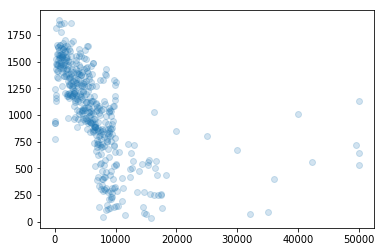

In [211]:
X = maxes.index
y = maxes['hours_till_funded']
plt.scatter(X, y, alpha=0.2)
plt.show()

It's interesting to see that downward trend. Although this is only maximums, it could shed light onto some issue Kiva has with promoting some of the loans that require more money, rather than promoting the loans for people who really need it. Let's take a look at the average and minimums as well, just to get an idea.

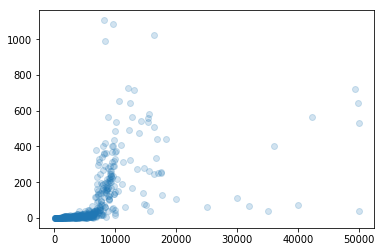

In [212]:
loan_groups = data.groupby('loan_amount')
mins = loan_groups.min()
means = loan_groups.mean()

plt.scatter(mins.index, mins['hours_till_funded'], alpha=0.2)
plt.show()

This minimums looked just about as I expected, with the minimums following a sort of exponential function. Smaller loans are bound to be able to be funded faster than bigger loans, so this makes sense

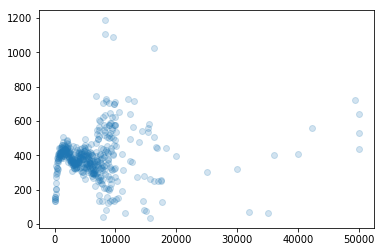

In [213]:
plt.scatter(means.index, means['hours_till_funded'], alpha=0.2)

Now the mean looks odd and intriguing. It has this sharp rise, then slowly fluctuates in a downward trend, which is odd considering there is no normalization. This indicates that some of the larger loans are simply being funded faster than smaller loans. Let's see if this just has to do with the number of loans in each bucket.

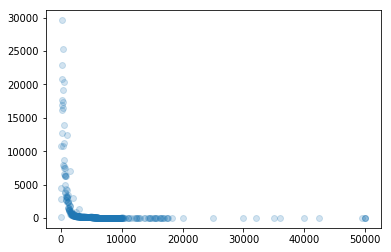

In [214]:
counts = loan_groups.count()

plt.scatter(counts.index, counts['hours_till_funded'], alpha=0.2)
plt.show()

This looks as expected. Maybe the average funding velocity (loan_amount/hours_till_funded) can give insights into the odd shape of the average funding time.

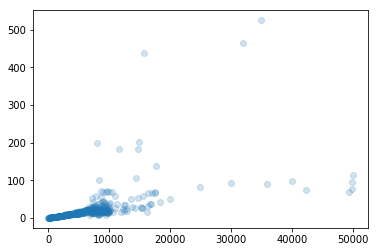

In [215]:
plt.scatter(means.index, means.index/means['hours_till_funded'], alpha=0.2)
plt.show()

So this is a very interesting graph. It implies that people tend to fund larger loans faster than smaller loans. This could be due to the amount of loans at each loan amount. If a lender lends money to one project from each price range, then it's obvious that due to the fact that there are fewer large loans, that they would get funded more. Still, this could be viewed as an issue, especially if Kiva wants the money to go to those who need it the most.

Now back to the task of populating the NaNs for the `hours_till_funded` feature, since we want a way to represent that this loan never got fully funded, but do so in a way that just makes the data significant, rather than leave them as NaN or give each of the loans that didn't get funded some arbitrarily large about of time to get funded. This is important so that whatever model we generate treates outliers locally rather than globally. I don't want the model to see the data and say "Oh wow look at these outliers", I want it to see the data as a whole have no particular outliers, but when looking at a subset of the data, see outliers. What I plan on doing is computing the average funding velocity (of the loans which I can compute one) for a particular loan size (using LinearRegression), the use it to compute a prospective `expected_hours_till_funded`. I will then, under the assumption that the loan reached the amount it was funded when it reached the expected hours till funded, divide the expected hours by the percent of the loan that was funded for all of the loans that weren't fully funded, and use this new value as the hours till funded. Depending on the data, I might also give this value a little nudge by introducing a coefficient to raise the amount of hours a little more.

In [216]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

X = means.index.values.reshape(-1, 1)
y = (means.index/means['hours_till_funded'])

lin_reg.fit(X[:100], y[:100])
preds = lin_reg.predict(X)

The reason that I am only using part of the data to fit the linear regression is to ensure that the intercept is positive. Otherwise the smaller loans get a negative expected funing velocity, which isn't very useful

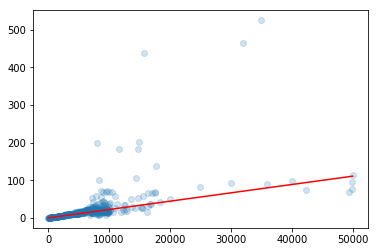

In [217]:
plt.scatter(X, y, alpha=0.2)
plt.plot(X, preds, c='r')

Although this might not be perfect, especially for higher values, it should be a rather good way to predict how long a certain loan should take, based on how large that loan is. And even though this line only takes into account the first 100 loan amounts, it still produces line that fits the data rather well.

In [218]:
lin_reg.coef_[0], lin_reg.intercept_

(0.0022150186161036447, 0.27150944584848746)

In [219]:
f = lambda x: lin_reg.coef_[0]*x + lin_reg.intercept_

final_data['expected_funding_velocity'] = final_data['loan_amount'].apply(f)
final_data['expected_hours_till_funded'] = final_data['loan_amount']/final_data['expected_funding_velocity']

In [220]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 533461 entries, 0 to 533460
Data columns (total 88 columns):
id                                   533461 non-null int64
funded_amount                        533461 non-null float64
loan_amount                          533461 non-null float64
activity                             533461 non-null object
sector                               533461 non-null object
use                                  533456 non-null object
country_code                         533453 non-null object
country                              533461 non-null object
region                               533461 non-null object
currency                             533461 non-null object
partner_id                           533461 non-null float64
posted_time                          533461 non-null datetime64[ns]
disbursed_time                       533461 non-null datetime64[ns]
funded_time                          499549 non-null datetime64[ns]
term_in_months         

In [221]:
final_data['percent_funded'] = final_data['funded_amount']/final_data['loan_amount']
final_data['fully_funded'] = final_data['funded_amount'] >= final_data['loan_amount']

In [222]:
final_data['hours_till_funded'] = final_data['hours_till_funded'].fillna(final_data['expected_hours_till_funded']/final_data['percent_funded'])
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 533461 entries, 0 to 533460
Data columns (total 90 columns):
id                                   533461 non-null int64
funded_amount                        533461 non-null float64
loan_amount                          533461 non-null float64
activity                             533461 non-null object
sector                               533461 non-null object
use                                  533456 non-null object
country_code                         533453 non-null object
country                              533461 non-null object
region                               533461 non-null object
currency                             533461 non-null object
partner_id                           533461 non-null float64
posted_time                          533461 non-null datetime64[ns]
disbursed_time                       533461 non-null datetime64[ns]
funded_time                          499549 non-null datetime64[ns]
term_in_months         

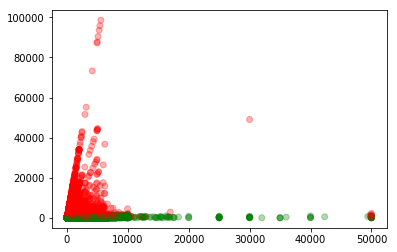

In [223]:
colors = ('r', 'g')
get_c = lambda i: colors[i]
inst_cols = final_data['fully_funded'].apply(get_c)
plt.scatter(final_data['loan_amount'], final_data['hours_till_funded'], c=inst_cols, alpha=0.3)
plt.show()

Here you can see that the red points in the data contain the values which we populated. This data might be a little concerning, given by how skewed the data is, but the point is for the loans that were not fully funded to be casted as outliers, but in an intelligent way, rather than just giving them some arbitrary value. Let's see how much of the data has a really high value (let's say greater than 2100 hours, since is looks like most of the green data stops about there. This is about 2.9 months)

In [224]:
(final_data['hours_till_funded'] > 2100).sum()

6577

Although this might be considered a lot, keep lin mind the amount of data that we have in total. This is just a rather small portion of all the data we have.

In [225]:
((final_data['hours_till_funded'] > 2100).sum())/len(final_data)

0.012328923763874023

A whopping 1.2% of the data consists of data that falls way outside the trend, which is nothing to worry about. In fact, I would hope that the model would pick up the significance of these loans in order to predict when an incoming loan has a high chance of taking way too long to be funded. This even includes a few 'inf' values, since some of the loans listed did not get funded at all. Let's see how many of those there are.

In [226]:
(final_data['hours_till_funded'] == float('inf')).sum()

2113

Note that this means there are only 6577 - 2113 = 4464 actual outliers, whereas the 'inf' values are a result of unfunded project, which I wouldn't describe as outliers, but just the way to numerically denote an unfunded project. This also has the implication (due to the fantastic properties of Python) that the `loan_amount`/`hours_till_funded` will be 0 whenever `hours_till_funded` is 'inf'.

In [227]:
final_data['funding_velocity'] = final_data['loan_amount']/final_data['hours_till_funded']

In [228]:
final_data[final_data['hours_till_funded'] == float('inf')][['hours_till_funded', 'funding_velocity']].drop_duplicates()

,hours_till_funded,funding_velocity
173914,inf,0.0


As you can see, all of the entries with 'inf' `hours_till_funded` also have 0 `funding_velocity`, which is great, because I don't have to do any more work for this feature

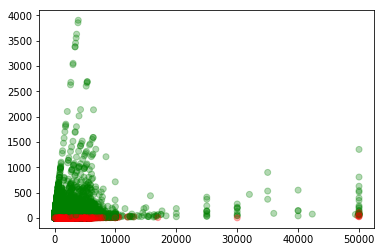

In [229]:
plt.scatter(final_data['loan_amount'], final_data['funding_velocity'], c=inst_cols, alpha=0.3)
plt.show()

Here, you can see that pretty much all of the red points have a rather low funding velocity, which was the intention of the formula used to fill in these null values. You can also see the slight upward trend like in the averages, which is a good indication that this data we added will work well with the model. Something else to notice is that quite a few of the filled in values seem rather normal. This ideally indicates that the loan was nearly funded, so rather than placing a significant marker on that data (like an infinite or really large hours_till_funded), the formula created a more reasonable guess as to what it might have been.

Let's take a look at what else we need to fill in before applying some sort of model

In [230]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 533461 entries, 0 to 533460
Data columns (total 91 columns):
id                                   533461 non-null int64
funded_amount                        533461 non-null float64
loan_amount                          533461 non-null float64
activity                             533461 non-null object
sector                               533461 non-null object
use                                  533456 non-null object
country_code                         533453 non-null object
country                              533461 non-null object
region                               533461 non-null object
currency                             533461 non-null object
partner_id                           533461 non-null float64
posted_time                          533461 non-null datetime64[ns]
disbursed_time                       533461 non-null datetime64[ns]
funded_time                          499549 non-null datetime64[ns]
term_in_months         

The first feature I can see in this list is `use` which is a user input string. Now this could be used with NLP in order to extract some potentially useful metrics, but that's a little out of the scope of my abilities and knowledge, so we can just get rid of it, and not deal with it.

In [231]:
final_data.drop('use', axis=1, inplace=True)

The next feature that isn't completely populated is `country_code`. Considering that the `country` feature is fully populated, I see no issues with dropping this feature.

In [232]:
final_data.drop('country_code', axis=1, inplace=True)

After this, the next feature is `funded_time`. Although this will be removed eventually (since ML algorithms won't know what to do with a DateTime object), I will leave it in case I want to compute something else with it.

After this we have the field `names`. I have no idea what data this holds, so let's take a look.

In [233]:
final_data['names'].sample(10)

67515                      Salepouae Road; Tuamasaga; Samoa
385589    Sibulan; Negros Oriental; Central Visayas; Phi...
158242                Narra; Palawan; MIMAROPA; Philippines
84593              Ghozimalik; Khatlon Province; Tajikistan
78677            Paraguari; ParaguarÍ_ Department; Paraguay
39766     San Francisco Gotera; MorazÍn Department; El ...
452157            Kisumu; East Kisumu; Kisumu County; Kenya
421839                                  Kenya; Busia County
353035                   Taveta; Taita-Taveta County; Kenya
501736        Krong Siem Reap; Siem Reap Province; Cambodia
Name: names, dtype: object

So it looks like this is some sort of alternate names for the region/country for the loan or whatnot, which is not really helpful, considering how hectic these look like, so it can be dropped

In [234]:
final_data.drop('names', axis=1, inplace=True)

In [235]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 533461 entries, 0 to 533460
Data columns (total 88 columns):
id                                   533461 non-null int64
funded_amount                        533461 non-null float64
loan_amount                          533461 non-null float64
activity                             533461 non-null object
sector                               533461 non-null object
country                              533461 non-null object
region                               533461 non-null object
currency                             533461 non-null object
partner_id                           533461 non-null float64
posted_time                          533461 non-null datetime64[ns]
disbursed_time                       533461 non-null datetime64[ns]
funded_time                          499549 non-null datetime64[ns]
term_in_months                       533461 non-null float64
lender_count                         533461 non-null int64
repayment_interval     

The next features that are not fully populated are `lat` and `lon`. Now this could be useful to generate some interesting metrics, however I don't have any ideas that would be useful for this project, so they can be dropped without any real problems

In [236]:
final_data.drop(['lat', 'lon'], axis=1, inplace=True)

Then next feature with null values is `rural_pct`, which I believe is a percentage of the nation which is rural. Let's see what sort of data the locations with NaNs have.

In [237]:
final_data[~pd.notnull(final_data['rural_pct'])]

,id,funded_amount,loan_amount,activity,sector,country,region,currency,partner_id,posted_time,...,num_tags,num_male_borrowers,num_female_borrowers,time_till_funded,hours_till_funded,expected_funding_velocity,expected_hours_till_funded,percent_funded,fully_funded,funding_velocity
74,653415,4000.0,4000.0,Cosmetics Sales,Retail,United States,San Diego,USD,249.0,2014-01-02 21:52:39,...,4,0,1,14 days 22:04:00,3.580000e+02,9.131584,438.040108,1.000000,True,11.173184
257,653636,600.0,600.0,Cosmetics Sales,Retail,Kenya,Nairobi West,KES,138.0,2014-01-03 09:50:47,...,6,0,1,16 days 05:45:56,3.890000e+02,1.600521,374.878020,1.000000,True,1.542416
263,653604,700.0,700.0,Beauty Salon,Services,Kenya,Nairobi West,KES,138.0,2014-01-03 09:01:37,...,4,0,1,16 days 02:10:15,3.860000e+02,1.822022,384.188455,1.000000,True,1.813472
277,653681,475.0,475.0,Retail,Retail,Kenya,Nairobi West,KES,138.0,2014-01-03 11:36:18,...,0,0,1,2 days 02:51:31,5.000000e+01,1.323643,358.858013,1.000000,True,9.500000
279,653669,600.0,600.0,Dairy,Agriculture,Kenya,Nairobi West,KES,138.0,2014-01-03 11:13:58,...,0,0,1,0 days 11:11:09,1.100000e+01,1.600521,374.878020,1.000000,True,54.545455
293,653697,350.0,350.0,Personal Expenses,Personal Use,Kenya,malindi,KES,138.0,2014-01-03 13:16:45,...,2,0,1,0 days 10:52:51,1.000000e+01,1.046766,334.363184,1.000000,True,35.000000
294,653703,600.0,600.0,Grocery Store,Food,Kenya,Kiambu,KES,138.0,2014-01-03 13:58:12,...,3,0,1,6 days 11:20:47,1.550000e+02,1.600521,374.878020,1.000000,True,3.870968
298,653696,600.0,600.0,Personal Expenses,Personal Use,Kenya,malindi,KES,138.0,2014-01-03 13:08:07,...,0,0,1,0 days 12:35:56,1.200000e+01,1.600521,374.878020,1.000000,True,50.000000
303,653707,600.0,600.0,Retail,Retail,Kenya,Kericho,KES,138.0,2014-01-03 14:39:33,...,2,1,0,26 days 14:01:41,6.380000e+02,1.600521,374.878020,1.000000,True,0.940439
305,653692,600.0,600.0,Dairy,Agriculture,Kenya,Kericho,KES,138.0,2014-01-03 12:40:48,...,3,1,0,13 days 14:41:36,3.260000e+02,1.600521,374.878020,1.000000,True,1.840491


Now this is the first feature with potentially useful data that has null values which can't really be filled very easily.

It looks as though it's fairly random data that does not contain a rural_pct. Let's just take a look at that feature before doing anything else in order to understand what the data looks like.

In [238]:
final_data['rural_pct'].sample(10)

126657     96.0
11702       NaN
111991     90.0
321083     99.0
153497    100.0
161697     99.0
108411    100.0
14269      84.0
40550      69.0
224896     86.0
Name: rural_pct, dtype: float64

If this is in fact Rural Percentage of a particular region let's say, then it's somewhat odd that some places have a Rural Percentage of 0. Let's look at the data which this is true for.

In [239]:
final_data[final_data['rural_pct'] == 0].sample(10)

,id,funded_amount,loan_amount,activity,sector,country,region,currency,partner_id,posted_time,...,num_tags,num_male_borrowers,num_female_borrowers,time_till_funded,hours_till_funded,expected_funding_velocity,expected_hours_till_funded,percent_funded,fully_funded,funding_velocity
343867,1118955,250.0,250.0,Clothing Sales,Clothing,Pakistan,Rawalpindi,PKR,247.0,2016-07-19 11:27:11,...,0,0,1,37 days 04:22:32,892.0,0.825264,302.933328,1.0,True,0.280269
361373,1138903,575.0,575.0,Food Production/Sales,Food,Togo,Agoe,XOF,296.0,2016-08-24 12:44:52,...,5,0,1,10 days 21:27:26,261.0,1.545145,372.133324,1.0,True,2.203065
501777,1297084,925.0,925.0,Higher education costs,Education,Tajikistan,Yavan,TJS,100.0,2017-05-12 08:43:09,...,2,1,0,6 days 14:04:50,158.0,2.320402,398.637880,1.0,True,5.854430
145073,871875,475.0,475.0,General Store,Retail,Philippines,Caloocan City,PHP,144.0,2015-04-20 02:22:02,...,0,0,1,3 days 23:02:20,95.0,1.323643,358.858013,1.0,True,5.000000
24819,692382,375.0,375.0,Shoe Sales,Retail,Pakistan,Lahore,PKR,247.0,2014-04-02 11:16:10,...,0,0,1,18 days 02:45:02,434.0,1.102141,340.246715,1.0,True,0.864055
357513,1135075,150.0,150.0,Food Production/Sales,Food,Togo,Agoe,XOF,296.0,2016-08-18 10:30:19,...,2,0,1,7 days 16:34:12,184.0,0.603762,248.442169,1.0,True,0.815217
508697,1305292,225.0,225.0,Charcoal Sales,Retail,Tanzania,Dar es Salaam,TZS,87.0,2017-05-24 07:21:47,...,3,0,1,7 days 02:30:45,170.0,0.769889,292.250060,1.0,True,1.323529
364641,1142903,250.0,250.0,Charcoal Sales,Retail,Tanzania,Mara North,TZS,87.0,2016-08-31 07:39:28,...,0,0,1,13 days 17:31:25,329.0,0.825264,302.933328,1.0,True,0.759878
309184,1067012,300.0,300.0,Tailoring,Services,Pakistan,Rawalpindi,PKR,247.0,2016-05-11 07:12:28,...,3,0,1,21 days 09:15:11,513.0,0.936015,320.507674,1.0,True,0.584795
490881,1285696,475.0,475.0,Cosmetics Sales,Retail,Togo,Tokoin,XOF,296.0,2017-04-25 10:49:16,...,5,0,1,15 days 10:59:35,370.0,1.323643,358.858013,1.0,True,1.283784


Using good old fashioned Google to look up some of these regions, it seems that they specify a city, so it makes sense that regions which encompass an entire urban area would have no Rural population. Interesting to know when considering how to fill in NaNs. Now let's see how many of the regions have both missing and filled values for the `rural_pct`

In [355]:
rural_regions = final_data.groupby(['region', 'country'])['rural_pct']

def some_nan(s):
    return len(s) > len(s.dropna())

def all_nan(s):
    return len(s.dropna()) == 0

rural_pct_info = rural_regions.agg([some_nan, all_nan])
(rural_pct_info['some_nan'] & ~rural_pct_info['all_nan']).sum()

128

It looks like 128 region, country pairs have some entries with a NaN, and others with a rural pct. Let's see what regions those are, because we can probably populate the NaNs with values from other entries

In [356]:
odd_regions = rural_pct_info[rural_pct_info['some_nan'] & ~rural_pct_info['all_nan']]
odd_regions.sample(10)

,,some_nan,all_nan
region,country,,
Dowa,Malawi,True,False
"patzicia, chimaltenango",Guatemala,True,False
Karachi,Pakistan,True,False
Mirebalais,Haiti,True,False
Distrito Federal,Mexico,True,False
Maputo,Mozambique,True,False
Narok,Kenya,True,False
Muranga,Kenya,True,False
Mubende,Uganda,True,False


Now I can just go straight to populating the NaNs using data from these regions. The first thing to do is create a second dataset with aggregated data, and join it on the main data in order to fill NaNs

In [357]:
def first_not_na(s):
    dn = s.dropna()
    if len(dn) == 0:
        return np.nan
    return s.dropna().values[0]

rural_pct_info = rural_regions.agg(first_not_na)
default_rural_pct_info = rural_regions.agg(some_nan)

In [361]:
(~pd.notnull(rural_pct_info)).sum(), default_rural_pct_info.sum()

(605, 733)

As you can see here, 128 more region_country pairs have a `rural_pct`, so I will merge and add this data to the main dataset

In [363]:
final_data = final_data.merge(rural_pct_info.to_frame(), how='left', left_on=['region', 'country'], right_index=True, suffixes=('', '_o'))

In [364]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 533461 entries, 0 to 533460
Data columns (total 87 columns):
id                                   533461 non-null int64
funded_amount                        533461 non-null float64
loan_amount                          533461 non-null float64
activity                             533461 non-null object
sector                               533461 non-null object
country                              533461 non-null object
region                               533461 non-null object
currency                             533461 non-null object
partner_id                           533461 non-null float64
posted_time                          533461 non-null datetime64[ns]
disbursed_time                       533461 non-null datetime64[ns]
funded_time                          499549 non-null datetime64[ns]
term_in_months                       533461 non-null float64
lender_count                         533461 non-null int64
repayment_interval     

In [365]:
final_data['rural_pct'] = final_data['rural_pct'].fillna(final_data['rural_pct_o'])
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 533461 entries, 0 to 533460
Data columns (total 87 columns):
id                                   533461 non-null int64
funded_amount                        533461 non-null float64
loan_amount                          533461 non-null float64
activity                             533461 non-null object
sector                               533461 non-null object
country                              533461 non-null object
region                               533461 non-null object
currency                             533461 non-null object
partner_id                           533461 non-null float64
posted_time                          533461 non-null datetime64[ns]
disbursed_time                       533461 non-null datetime64[ns]
funded_time                          499549 non-null datetime64[ns]
term_in_months                       533461 non-null float64
lender_count                         533461 non-null int64
repayment_interval     

With an impressive 16,000 entries added for rural_pct, I would consider this a win, but there are still values missing. Let's see what we can do by getting country data. For this, rather than just taking the value of one of the entries, I will take the mean of all non null values in each group.

First, I'll start by dropping the new column

In [366]:
final_data.drop('rural_pct_o', axis=1, inplace=True)

In [367]:
rural_country = final_data.groupby('country')['rural_pct']

def non_na_mean(s):
    return s.dropna().mean()

rural_pct_info = rural_country.agg(non_na_mean)
default_rural_pct_info = rural_country.agg(some_nan)

In [368]:
(~pd.notnull(rural_pct_info)).sum(), default_rural_pct_info.sum()

(7, 41)

Now, compared to 41 countries having some NaNs, only 7 countries will, so let's merge this new data with the dataset

In [369]:
final_data = final_data.merge(rural_pct_info.to_frame(), how='left', left_on='country', right_index=True, suffixes=('', '_o'))

In [370]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 533461 entries, 0 to 533460
Data columns (total 87 columns):
id                                   533461 non-null int64
funded_amount                        533461 non-null float64
loan_amount                          533461 non-null float64
activity                             533461 non-null object
sector                               533461 non-null object
country                              533461 non-null object
region                               533461 non-null object
currency                             533461 non-null object
partner_id                           533461 non-null float64
posted_time                          533461 non-null datetime64[ns]
disbursed_time                       533461 non-null datetime64[ns]
funded_time                          499549 non-null datetime64[ns]
term_in_months                       533461 non-null float64
lender_count                         533461 non-null int64
repayment_interval     

In [371]:
final_data['rural_pct'] = final_data['rural_pct'].fillna(final_data['rural_pct_o'])
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 533461 entries, 0 to 533460
Data columns (total 87 columns):
id                                   533461 non-null int64
funded_amount                        533461 non-null float64
loan_amount                          533461 non-null float64
activity                             533461 non-null object
sector                               533461 non-null object
country                              533461 non-null object
region                               533461 non-null object
currency                             533461 non-null object
partner_id                           533461 non-null float64
posted_time                          533461 non-null datetime64[ns]
disbursed_time                       533461 non-null datetime64[ns]
funded_time                          499549 non-null datetime64[ns]
term_in_months                       533461 non-null float64
lender_count                         533461 non-null int64
repayment_interval     

In [372]:
len(final_data) - final_data['rural_pct'].count()

1642

Now, only 1642 entries in the data have a NaN value for `rural_pct`. Let's drop the merged column, and check out what the still NaN data looks like

In [381]:
final_data.drop('rural_pct_o', axis=1, inplace=True)
final_data[~pd.notnull(final_data['rural_pct'])]['country'].drop_duplicates()

593           Ukraine
4819            Nepal
98885     Afghanistan
129165        Namibia
446711         Turkey
473677          Benin
523993         Bhutan
Name: country, dtype: object

So here you can see the countries that just don't have a `rural_pct` for whatever reason.

Using data from the [worldbank](https://data.worldbank.org/indicator/SP.RUR.TOTL.ZS?year_high_desc=true) I just looked up the rural percentages (2016) for each of these countries and created a small dataset (rather than importing the csv and combing through it), and filled the rest of these values with this new dataset.

In [386]:
rural_pct_info = {
    'Ukraine': 30,
    'Nepal': 81,
    'Afghanistan': 73,
    'Namibia': 52,
    'Turkey': 26,
    'Benin': 56,
    'Bhutan': 61
}

rural_pct_info = pd.Series(rural_pct_info)
rural_pct_info.to_frame()

,0
Afghanistan,73
Benin,56
Bhutan,61
Namibia,52
Nepal,81
Turkey,26
Ukraine,30


In [387]:
final_data = final_data.merge(rural_pct_info.to_frame(), how='left', left_on='country', right_index=True, suffixes=('', '_o'))
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 533461 entries, 0 to 533460
Data columns (total 87 columns):
id                                   533461 non-null int64
funded_amount                        533461 non-null float64
loan_amount                          533461 non-null float64
activity                             533461 non-null object
sector                               533461 non-null object
country                              533461 non-null object
region                               533461 non-null object
currency                             533461 non-null object
partner_id                           533461 non-null float64
posted_time                          533461 non-null datetime64[ns]
disbursed_time                       533461 non-null datetime64[ns]
funded_time                          499549 non-null datetime64[ns]
term_in_months                       533461 non-null float64
lender_count                         533461 non-null int64
repayment_interval     

In [389]:
final_data['rural_pct'] = final_data['rural_pct'].fillna(final_data[0])
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 533461 entries, 0 to 533460
Data columns (total 87 columns):
id                                   533461 non-null int64
funded_amount                        533461 non-null float64
loan_amount                          533461 non-null float64
activity                             533461 non-null object
sector                               533461 non-null object
country                              533461 non-null object
region                               533461 non-null object
currency                             533461 non-null object
partner_id                           533461 non-null float64
posted_time                          533461 non-null datetime64[ns]
disbursed_time                       533461 non-null datetime64[ns]
funded_time                          499549 non-null datetime64[ns]
term_in_months                       533461 non-null float64
lender_count                         533461 non-null int64
repayment_interval     

In [395]:
final_data.drop(0, axis=1, inplace=True)
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 533461 entries, 0 to 533460
Data columns (total 85 columns):
id                                   533461 non-null int64
funded_amount                        533461 non-null float64
loan_amount                          533461 non-null float64
activity                             533461 non-null object
sector                               533461 non-null object
country                              533461 non-null object
region                               533461 non-null object
currency                             533461 non-null object
partner_id                           533461 non-null float64
posted_time                          533461 non-null datetime64[ns]
disbursed_time                       533461 non-null datetime64[ns]
funded_time                          499549 non-null datetime64[ns]
term_in_months                       533461 non-null float64
lender_count                         533461 non-null int64
repayment_interval     

Finally, we have the `rural_pct` feature completely filled.

The next feature to look at is `world_region`. Let's see what this data looks like.

In [396]:
final_data['world_region'].drop_duplicates()

0                       South Asia
9                              NaN
32              Sub-Saharan Africa
34     Latin America and Caribbean
36       East Asia and the Pacific
100        Europe and Central Asia
488                    Arab States
Name: world_region, dtype: object

`world_region` is a global region, which could be a very useful feature, so it would be best to try and fill the NaNs.

Let's look at the countries for the NaNs

In [397]:
final_data[~pd.notnull(final_data['world_region'])]['country'].drop_duplicates()

9                   India
74          United States
81              Palestine
105           Philippines
322              Cambodia
593               Ukraine
660               Albania
661            Tajikistan
695               Georgia
749            Costa Rica
855            Azerbaijan
1052           Kyrgyzstan
1071               Mexico
1318              Armenia
1341             Cameroon
1700             Paraguay
2043                Kenya
2236               Israel
2817            Guatemala
2855         Burkina Faso
2906                Samoa
4437                 Peru
4676              Bolivia
4819                Nepal
5127              Lebanon
9679         South Africa
17303            Zimbabwe
20572            Thailand
26143             Nigeria
31042         El Salvador
35497        Sierra Leone
45632               Haiti
61634             Somalia
75125              Malawi
75362             Moldova
78558               Ghana
80693     Solomon Islands
95355               Egypt
120602      

Let's see if we can do something similar to what we did for `rural_pct`

In [398]:
wr_country = final_data.groupby('country')['world_region']

wr_info = wr_country.agg(first_not_na)
default_wr_info = wr_country.agg(some_nan)

In [399]:
(~pd.notnull(wr_info)).sum(), default_wr_info.sum()

(21, 52)